<a href="https://colab.research.google.com/github/Olanle/Project-002/blob/main/001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
 98% 1.01G/1.03G [00:12<00:00, 346MB/s]
100% 1.03G/1.03G [00:12<00:00, 90.4MB/s]


In [ ]:
!unzip asl-alphabet.zip -d asl_alphabet_data

Archive:  asl-alphabet.zip
replace asl_alphabet_data/asl_alphabet_test/asl_alphabet_test/A_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
%pip install tensorflow numpy matplotlib

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# 1. Set path and image size
dataset_path = '/content/asl_alphabet_data/asl_alphabet_train/asl_alphabet_train'
img_height, img_width = 64, 64

# 2. Initialize lists for images and labels
images = []
labels = []
class_names = sorted(os.listdir(dataset_path))  # ['A', 'B', ..., 'Z']

# 3. Load images and labels
for label_index, label_name in enumerate(class_names):
    label_folder = os.path.join(dataset_path, label_name)
    if os.path.isdir(label_folder):
        for file in tqdm(os.listdir(label_folder), desc=f"Loading {label_name}"):
            img_path = os.path.join(label_folder, file)
            img = load_img(img_path, target_size=(img_height, img_width))
            img_array = img_to_array(img) / 127.5 - 1.0  # Normalize to [-1, 1]
            images.append(img_array)
            labels.append(label_index)

# 4. Convert to NumPy arrays and ensure dtype float32 for model input
images = np.array(images, dtype=np.float32)
labels = np.array(labels)

# 5. Train/test split
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, stratify=labels, random_state=42
)

# 6. One-hot encode labels
train_labels_cat = to_categorical(train_labels, num_classes=len(class_names))
test_labels_cat = to_categorical(test_labels, num_classes=len(class_names))

print("✅ Dataset ready!")
print("Train shape:", train_images.shape)
print("Test shape:", test_images.shape)

# 7. Define CNN model
num_classes = len(class_names)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 8. Train the model
history = model.fit(
    train_images, train_labels_cat,
    validation_split=0.2,
    epochs=2,
    batch_size=64,
    verbose=1
)

# 9. Evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(f"Test accuracy: {test_acc:.4f}")


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Assume 'model' and 'class_names' are already loaded/defined from your training

uploaded = files.upload()  # User selects image(s) from their device

for filename in uploaded.keys():
    # Load and preprocess image
    img = load_img(filename, target_size=(64, 64))
    img_array = img_to_array(img) / 127.5 - 1.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_label = class_names[predicted_index]

    print(f"Image '{filename}' predicted as letter: {predicted_label}")


In [ ]:
# STEP 2: Set Dataset Directory
data_dir = "asl_alphabet_data/asl_alphabet_train/asl_alphabet_train"
img_height, img_width = 64, 64  # Resize images for performance
batch_size = 32

# STEP 3: Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [ ]:
# STEP 4: Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# STEP 5: Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# STEP 6: Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 189s 85ms/step - accuracy: 0.2167 - loss: 2.6499 - val_accuracy: 0.5618 - val_loss: 1.4070
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 174s 80ms/step - accuracy: 0.6490 - loss: 1.0340 - val_accuracy: 0.7035 - val_loss: 0.9467
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 175s 81ms/step - accuracy: 0.7766 - loss: 0.6579 - val_accuracy: 0.7525 - val_loss: 0.8117
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 174s 80ms/step - accuracy: 0.8348 - loss: 0.4801 - val_accuracy: 0.7402 - val_loss: 0.8323
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 181s 83ms/step - accuracy: 0.8674 - loss: 0.3820 - val_accuracy: 0.7809 - val_loss: 0.7905
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 185s 85ms/step - accuracy: 0.8914 - loss: 0.3187 - val_accuracy: 0.7949 - val_loss: 0.7243
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 174s 80ms/step - accuracy: 0.9061 - loss: 0.2730 - val_accuracy: 0.7910 - val_loss: 0.7076
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 177s 81ms/step - accuracy: 

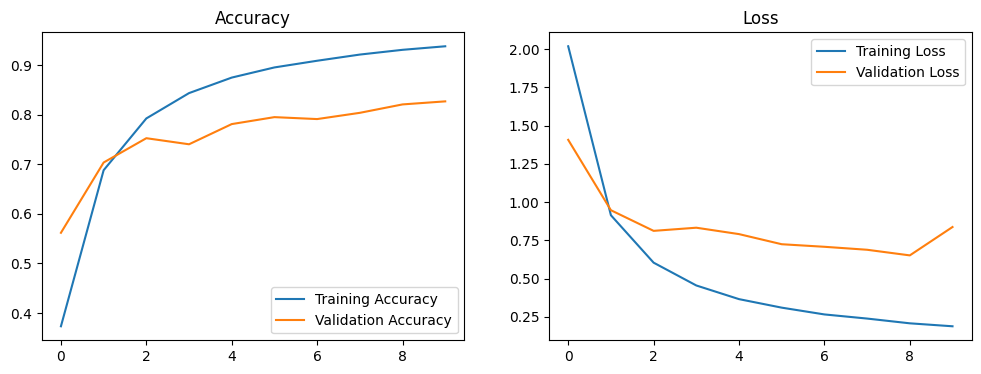

In [ ]:
# STEP 7: Evaluate Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

Saving I sign.png to I sign.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


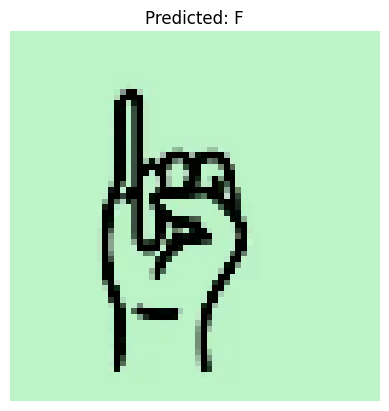

In [ ]:
# STEP 9: Upload a Test Image
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
    # Load and preprocess image
    img_path = filename
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # Show Image and Prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


In [ ]:
# 1. Import Libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# 2. Set Paths
base_dir = '/content/asl_alphabet_data/asl_alphabet_train/asl_alphabet_train'  # After unzipping

# 3. Data Augmentation and Preprocessing
img_height, img_width = 64, 64
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

# 4. CNN Model Architecture
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# 5. Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the Model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=1,
    callbacks=[early_stop]
)

# 7. Save the Model (Optional)
model.save("asl_cnn_model.h5")


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 188s 168ms/step - accuracy: 0.2335 - loss: 2.9226 - val_accuracy: 0.1926 - val_loss: 6.1880
